In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from utils import modeling 
from utils import analysis_pipeline

In [3]:
sample1 = modeling.sample(0,1,2)
sample2 = modeling.sample(1,1,2)
print(sample1,sample2)

[ 0.68348746 -1.21062109] [0.5587622  1.74071811]


In [4]:
decision1 = modeling.decision(sample1,0.5)
decision2 = modeling.decision(sample2,0.5)
print(decision1,decision2)

0 1


In [5]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [6]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [7]:
set_sizes = np.random.randint(3,6,100)
df = pd.DataFrame(set_sizes, columns=['set_size'])
mean = []
sample = []
decision = []
accuracy = []

df


,set_size
0,5
1,4
2,3
3,3
4,3
...,...
95,3
96,4
97,5
98,3


In [8]:
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean(row_data['set_size']))

df['mean'] = mean

In [9]:
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.sample(row_data['mean'],1,1))

df['sample'] = sample

In [10]:
for (row_index,row_data) in df.iterrows():
    decision.append(modeling.decision(row_data['sample'],0.5))

df['decision'] = decision

In [11]:
ground_truth = []
for (row_index,row_data) in df.iterrows():
    ground_truth.append(1)

df['ground_truth'] = ground_truth

In [12]:
df

,set_size,mean,sample,decision,ground_truth
0,5,0.25,[-0.21700620787053726],0,1
1,4,0.20,[0.31021608409527546],0,1
2,3,0.15,[0.19301495734469834],0,1
3,3,0.15,[-0.9332247095551282],0,1
4,3,0.15,[0.33582719165365604],0,1
...,...,...,...,...,...
95,3,0.15,[0.2529533384861481],0,1
96,4,0.20,[-0.20013433840923628],0,1
97,5,0.25,[2.2700443913202597],1,1
98,3,0.15,[-0.08315945181864332],0,1


In [13]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.accuracy(row_data['ground_truth'],row_data['decision']))
    
df['correct'] = accuracy

In [14]:
df

,set_size,mean,sample,decision,ground_truth,correct
0,5,0.25,[-0.21700620787053726],0,1,0
1,4,0.20,[0.31021608409527546],0,1,0
2,3,0.15,[0.19301495734469834],0,1,0
3,3,0.15,[-0.9332247095551282],0,1,0
4,3,0.15,[0.33582719165365604],0,1,0
...,...,...,...,...,...,...
95,3,0.15,[0.2529533384861481],0,1,0
96,4,0.20,[-0.20013433840923628],0,1,0
97,5,0.25,[2.2700443913202597],1,1,1
98,3,0.15,[-0.08315945181864332],0,1,0


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

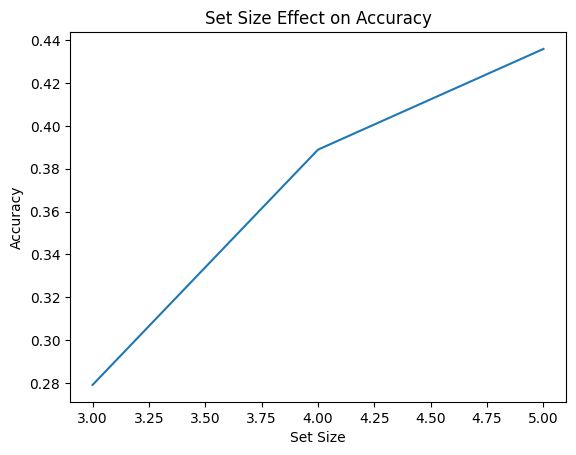

In [15]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy')